In [1]:
import pandas as pd
from pandas import get_dummies
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import nbformat



from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
Data_PATH = r"..\data\processed\preprocessed_1.csv.pkl"

TECH_COL = ["MiscTechWorkedWith", "NEWCollabToolsWorkedWith", "DatabaseWorkedWith", "WebframeWorkedWith", "LanguageWorkedWith", "PlatformWorkedWith"]
JOB_COL = "DevType"
COL_READ = TECH_COL +[JOB_COL]

In [3]:
df = pd.read_pickle(Data_PATH)
df = df.filter(COL_READ)
df.head()

,MiscTechWorkedWith,NEWCollabToolsWorkedWith,DatabaseWorkedWith,WebframeWorkedWith,LanguageWorkedWith,PlatformWorkedWith,DevType
0,"[.NET, .NET Core]","[Confluence, Jira, Slack, Microsoft Azure, Tre...","[Elasticsearch, Microsoft SQL Server, Oracle]","[ASP.NET, ASP.NET Core]","[C#, HTML/CSS, JavaScript]",[Windows],"[Developer, desktop or enterprise applications..."
1,[React Native],"[Confluence, Jira, Github, Gitlab, Slack]",[],[],"[JavaScript, Swift]",[iOS],"[Developer, full-stack, Developer, mobile]"
2,[],[],[],[],"[Objective-C, Python, Swift]",[],[]
3,[],[],[],[],[],[],[]
4,[Ansible],"[Confluence, Jira, Github, Slack, Google Suite...","[MySQL, PostgreSQL, Redis, SQLite]",[Ruby on Rails],"[HTML/CSS, Ruby, SQL]","[AWS, Docker, Linux, MacOS, Windows]",[]


In [4]:
def frequency_visualize(data):
    flattend_list = []
    colun_names = list(data.columns)
    for col_num in range(0,data.shape[1]):
        temp = [item for sublist in data[colun_names[col_num]] for item in sublist]
        flattend_list.append(temp)
    
    flattend_all_list = [item for sublist in flattend_list for item in sublist]
    freq_languages = Counter(flattend_all_list)

    language = list(freq_languages.keys())
    frequancy = list(freq_languages.values())
    plt.figure(figsize=(10, 20))
    plt.barh(language, frequancy)



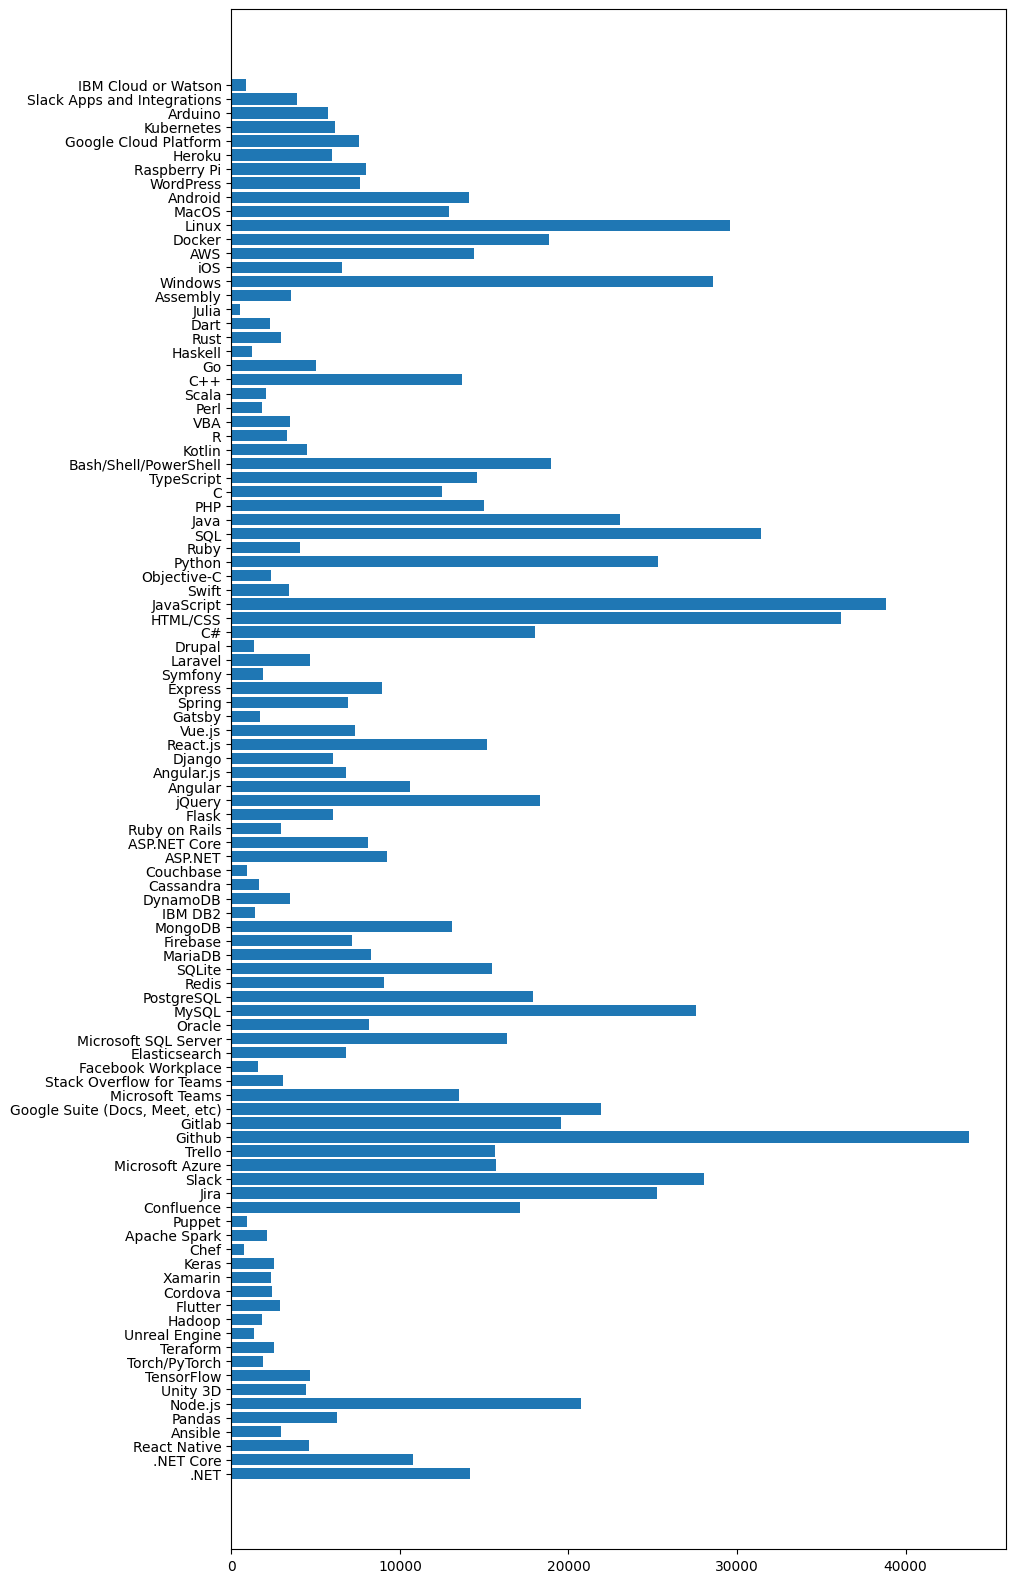

In [5]:
skills = df[TECH_COL]
frequency_visualize(skills)

In [6]:
i=0
df["LanguageWorkedWith"][i] + df["WebframeWorkedWith"][i] + df["DatabaseWorkedWith"][i] , df["DevType"][i]

(['C#',
  'HTML/CSS',
  'JavaScript',
  'ASP.NET',
  'ASP.NET Core',
  'Elasticsearch',
  'Microsoft SQL Server',
  'Oracle'],
 ['Developer, desktop or enterprise applications', 'Developer, full-stack'])

In [7]:
flattend_list = [item for sublist in df["DevType"] for item in sublist]
frequancy_jobs = Counter(flattend_list)
jobs = list(frequancy_jobs.keys())
# frequency_visualize(df["DevType"])
jobs

['Developer, desktop or enterprise applications',
 'Developer, full-stack',
 'Developer, mobile',
 'Designer',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, QA or test',
 'DevOps specialist',
 'Developer, game or graphics',
 'Database administrator',
 'Developer, embedded applications or devices',
 'Engineer, data',
 'Educator',
 'System administrator',
 'Engineering manager',
 'Product manager',
 'Data or business analyst',
 'Academic researcher',
 'Data scientist or machine learning specialist',
 'Scientist',
 'Senior executive/VP',
 'Engineer, site reliability',
 'Marketing or sales professional']

In [8]:
df2 = df.copy()
dfs_encoded ={}
for col in COL_READ:
    mlb = MultiLabelBinarizer()
    df_encodded = pd.DataFrame(mlb.fit_transform(df[col]), columns = mlb.classes_, index=df[col].index)
    dfs_encoded[col] = df_encodded

df2 = pd.concat(dfs_encoded, axis=1)
df2.head()

MiscTechWorkedWith                                                      \
                .NET .NET Core Ansible Apache Spark Chef Cordova Flutter   
0                  1         1       0            0    0       0       0   
1                  0         0       0            0    0       0       0   
2                  0         0       0            0    0       0       0   
3                  0         0       0            0    0       0       0   
4                  0         0       1            0    0       0       0   

                        ...           DevType                          \
  Hadoop Keras Node.js  ... Developer, mobile Educator Engineer, data   
0      0     0       0  ...                 0        0              0   
1      0     0       0  ...                 1        0              0   
2      0     0       0  ...                 0        0              0   
3      0     0       0  ...                 0        0              0   
4      0     0       0  ...                 0        0              0   

                                                  \
  Engineer, site reliability Engineering manager   
0                          0                   0   
1                          0                   0   
2                          0                   0   
3                          0                   0   
4                          0                   0   

                                                             \
  Marketing or sales professional Product manager Scientist   
0                               0               0         0   
1                               0               0         0   
2                               0               0         0   
3                               0               0         0   
4                               0               0         0   

                                            
  Senior executive/VP System administrator  
0                   0                    0  
1                   0                    0  
2                   0                    0  
3                   0                    0  
4                   0                    0  

[5 rows x 124 columns]

In [9]:
df2.shape

(64461, 124)

# Heatmab to show the precentage of each skill in each job

In [14]:
#need to make this for loop throw jobs and TECH_COL
job_mask = df2[("DevType", jobs[0])]==1
skill_percentage1 = list(df2.loc[job_mask]["LanguageWorkedWith"].mean()*100)
column_name = list(df2.loc[job_mask]["LanguageWorkedWith"].columns)

job_mask = df2[("DevType", jobs[1])]==1
skill_percentage2 = list(df2.loc[job_mask]["LanguageWorkedWith"].mean()*100)
column_name = list(df2.loc[job_mask]["LanguageWorkedWith"].columns)

jobs_name = [jobs[0],jobs[1]]

skill_percentage_all = [skill_percentage1,skill_percentage2]

In [15]:
fig = go.Figure(data=go.Heatmap(
        z=skill_percentage_all,
        x=column_name,
        y=jobs_name,
        colorscale='Viridis'))
fig.show()

In [13]:
temp = pd.DataFrame(skill_percentage_all, columns=column_name, index=jobs_name)
temp.head()
fig = px.imshow(temp, color_continuous_scale='viridis')
fig.show()